In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
from matplotlib import gridspec
from matplotlib.pyplot import *
import seaborn as sns
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
data=pd.read_csv('Hotel_Reviews.csv')

In [5]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194.0,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
data.shape

(67141, 17)

In [17]:
data['Negative_Review']

0          I am so angry that i made this post available...
1                                               No Negative
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
                                ...                        
515733     no trolly or staff to help you take the lugga...
515734             The hotel looks like 3 but surely not 4 
515735     The ac was useless It was a hot week in vienn...
515736                                          No Negative
515737         I was in 3rd floor It didn t work Free Wife 
Name: Negative_Review, Length: 515738, dtype: object

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
# 1. Lower case
def lowercase(text):
    return text.lower()

# 2. Remove punctuation
def remove_punctuation(text):
    try:
        return text.translate(str.maketrans('', '', string.punctuation))
    except:
        return ''

import re
# 3. Remove digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

# 4. Tokenize text
def tokenize_text(text):
    return nltk.word_tokenize(text)

# 5. Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# 6. Perform stemming
def stem_tokens(tokens):
    ps = PorterStemmer()
    return [ps.stem(word) for word in tokens]

# 5. Perform lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [25]:
print(data.columns)

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


In [27]:
print(data.head())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

In [29]:
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
# Text Cleaning (Lowercasing, Removing URLs, Handles, Hashtags, and Punctuation)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove handles and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert to lowercase


In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to remove extra whitespace
def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

# Function to tokenize text
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Function to stem tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Complete clean_text function
def clean_text(text):
    text = remove_numbers(text)
    text = remove_extra_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    stemmed_tokens = stem_tokens(tokens)
    lemmatized_tokens = lemmatize_tokens(stemmed_tokens)  # Use stemmed tokens for lemmatization
    return ' '.join(lemmatized_tokens)
# Example usage
# data['Cleaned_Review'] = data['Review_Text'].apply(clean_text)


In [35]:
# Display the first few rows of Positive and Negative Reviews
print(data[['Positive_Review', 'Negative_Review']].head())

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

                                     Negative_Review  
0   I am so angry that i made this post available...  
1                                        No Negative  
2   Rooms are nice but for elderly a bit difficul...  
3   My room was dirty and I was afraid to walk ba...  
4   You When I booked with your company on line y...  


In [37]:
# Filter the DataFrame to show rows where the Positive Review is not empty
positive_reviews_data = data[data['Positive_Review'] != 'No Positive']
print(positive_reviews_data.head())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

In [39]:
# Create a new column combining both Positive and Negative Reviews
data['Combined_Review'] = data['Positive_Review'] + " " + data['Negative_Review']
print(data[['Combined_Review']].head())

                                     Combined_Review
0   Only the park outside of the hotel was beauti...
1   No real complaints the hotel was great great ...
2   Location was good and staff were ok It is cut...
3   Great location in nice surroundings the bar a...
4   Amazing location and building Romantic settin...


In [41]:
# Count the number of reviews that contain actual positive feedback
positive_review_count = data[data['Positive_Review'] != 'No Positive'].shape[0]
print(f"Number of positive reviews: {positive_review_count}")

Number of positive reviews: 479792


In [43]:
# Calculate total positive and negative word counts
data['Total_Positive_Word_Count'] = data['Review_Total_Positive_Word_Counts']
data['Total_Negative_Word_Count'] = data['Review_Total_Negative_Word_Counts']

# Display total word counts for the first few rows
print(data[['Total_Positive_Word_Count', 'Total_Negative_Word_Count']].head())

   Total_Positive_Word_Count  Total_Negative_Word_Count
0                         11                        397
1                        105                          0
2                         21                         42
3                         26                        210
4                          8                        140


In [41]:
# Combine the Positive_Review and Negative_Review columns into a single corpus
data['Combined_Review'] = data['Positive_Review'] + " " + data['Negative_Review']

# Create a list of all reviews to form the corpus
corpus = data['Combined_Review'].tolist()

# Display the first 5 reviews in the corpus
print(corpus[:5])

[' Only the park outside of the hotel was beautiful   I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to

In [45]:
len(corpus)

NameError: name 'corpus' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


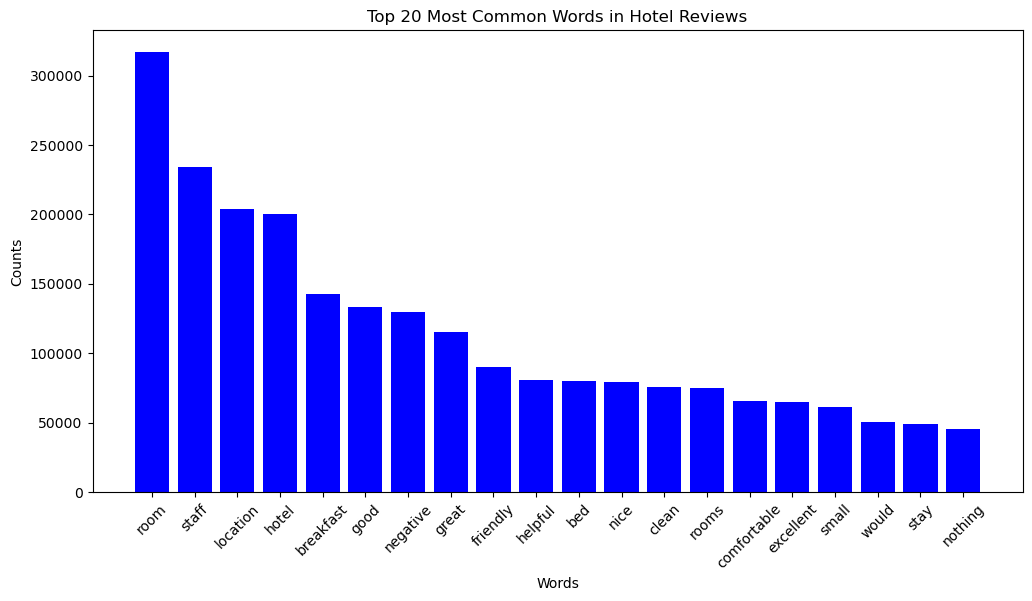

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords from nltk if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Combine the Positive_Review and Negative_Review columns into a single column
data['Combined_Review'] = data['Positive_Review'] + " " + data['Negative_Review']

# Convert the combined reviews to a single string
text_data = " ".join(data['Combined_Review'].tolist())

# Tokenize the text data into words
tokens = word_tokenize(text_data.lower())

# Remove punctuation and non-alphabetic characters
tokens = [re.sub(r'\W+', '', token) for token in tokens]

# Remove empty tokens
tokens = [token for token in tokens if token]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words
common_words = word_counts.most_common(20)

# Separate words and their counts for plotting
words, counts = zip(*common_words)

# Plotting the word counts
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='blue')
plt.title('Top 20 Most Common Words in Hotel Reviews')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


In [51]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [53]:
import spacy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.models import Word2Vec
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Make sure to download the NLTK stopwords and punkt for tokenization
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


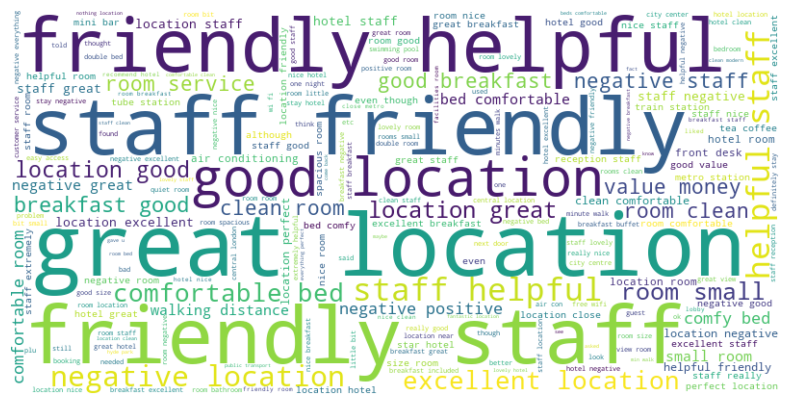

In [55]:
import matplotlib.pyplot as plt
# Make sure to download the NLTK stopwords and punkt for tokenization
nltk.download('stopwords')
nltk.download('punkt')
# Combine the Positive_Review and Negative_Review columns into a single column
data['Combined_Review'] = data['Positive_Review'] + " " + data['Negative_Review']

# Convert the combined reviews to a single string
text_data = " ".join(data['Combined_Review'].tolist())

# Tokenize the text data into words
tokens = word_tokenize(text_data.lower())

# Remove punctuation and non-alphabetic characters
tokens = [re.sub(r'\W+', '', token) for token in tokens]

# Remove empty tokens
tokens = [token for token in tokens if token]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Join the filtered tokens back into a string for word cloud generation
filtered_text = " ".join(filtered_tokens)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, colormap='viridis').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from pprint import pprint
# Combine the Positive_Review and Negative_Review columns into a single column
data['Combined_Review'] = data['Positive_Review'] + " " + data['Negative_Review']

# Use a sample of the data for faster execution (for testing)
sample_data = data['Combined_Review'].sample(frac=0.1, random_state=42).tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and non-alphabetic characters
    tokens = [re.sub(r'\W+', '', token) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return tokens

# Apply preprocessing to each review
processed_reviews = [preprocess_text(review) for review in sample_data]

# Create a dictionary representation of the documents
id2word = corpora.Dictionary(processed_reviews)

# Create a document-term matrix
corpus = [id2word.doc2bow(review) for review in processed_reviews]

# Build the LDA model with optimized parameters for faster execution
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=3,  # Reduced number of topics for testing
                     random_state=42,
                     update_every=1,
                     chunksize=50,  # Smaller chunk size for faster processing
                     passes=2,      # Fewer passes for faster execution
                     alpha='auto',
                     per_word_topics=True)

# Print the topics
pprint(lda_model.print_topics())


[(0,
  '0.045*"room" + 0.012*"positive" + 0.011*"reception" + 0.011*"one" + '
  '0.011*"night" + 0.011*"us" + 0.008*"check" + 0.008*"day" + 0.008*"could" + '
  '0.008*"even"'),
 (1,
  '0.049*"hotel" + 0.029*"would" + 0.028*"stay" + 0.014*"coffee" + '
  '0.011*"like" + 0.009*"tea" + 0.009*"away" + 0.009*"stayed" + '
  '0.008*"restaurants" + 0.008*"walking"'),
 (2,
  '0.051*"staff" + 0.042*"location" + 0.035*"room" + 0.031*"breakfast" + '
  '0.029*"good" + 0.027*"negative" + 0.025*"great" + 0.021*"hotel" + '
  '0.019*"friendly" + 0.017*"helpful"')]


In [63]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [65]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from pprint import pprint
import pyLDAvis.gensim_models
import pyLDAvis

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
# Combine the Positive_Review and Negative_Review columns into a single column
data['Combined_Review'] = data['Positive_Review'].astype(str) + " " + data['Negative_Review'].astype(str)

# Use a sample of the data for faster execution (for testing)
sample_data = data['Combined_Review'].sample(frac=0.1, random_state=42).tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and non-alphabetic characters
    tokens = [re.sub(r'\W+', '', token) for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return tokens

# Apply preprocessing to each review
processed_reviews = [preprocess_text(review) for review in sample_data]

# Create a dictionary representation of the documents
id2word = corpora.Dictionary(processed_reviews)

# Create a document-term matrix
corpus = [id2word.doc2bow(review) for review in processed_reviews]

# Build the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=5,  # Change this number to specify the number of topics
                     random_state=42,
                     update_every=1,
                     chunksize=50,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Print the topics
pprint(lda_model.print_topics())

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0,
  '0.032*"room" + 0.016*"us" + 0.016*"reception" + 0.015*"positive" + '
  '0.015*"one" + 0.014*"night" + 0.012*"get" + 0.011*"check" + 0.011*"day" + '
  '0.010*"time"'),
 (1,
  '0.035*"coffee" + 0.029*"fantastic" + 0.026*"near" + 0.023*"tea" + '
  '0.023*"away" + 0.020*"restaurants" + 0.019*"walking" + 0.019*"right" + '
  '0.016*"distance" + 0.015*"etc"'),
 (2,
  '0.058*"staff" + 0.056*"room" + 0.048*"location" + 0.045*"hotel" + '
  '0.036*"breakfast" + 0.033*"good" + 0.031*"negative" + 0.028*"great" + '
  '0.021*"friendly" + 0.020*"helpful"'),
 (3,
  '0.043*"bar" + 0.035*"like" + 0.028*"perfect" + 0.026*"view" + '
  '0.022*"amazing" + 0.020*"next" + 0.018*"door" + 0.017*"pool" + '
  '0.017*"loved" + 0.017*"best"'),
 (4,
  '0.025*"lovely" + 0.022*"area" + 0.020*"food" + 0.019*"restaurant" + '
  '0.016*"price" + 0.016*"expensive" + 0.014*"big" + 0.014*"money" + '
  '0.013*"much" + 0.013*"size"')]


In [77]:
pyLDAvis.save_html(lda_display, 'lda_visualization.html')
